In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
cs_set_180 = [16, 32, 48, 64, 108, 120, 128, 140]
cs_set_260 = [16, 32, 48, 64, 108, 120]
filename_template = 'perf_locs_{}_cs_{}'
file_folder = './log'

locs_180_time_glops = np.zeros([2, len(cs_set_180)])
locs_260_time_glops = np.zeros([2, len(cs_set_260)])

for locs_num in [180000, 260000]:
    if locs_num == 180000:
        _cs_set = cs_set_180
    else:
        _cs_set = cs_set_260
    for j, cs in enumerate(_cs_set):
        filename = filename_template.format(locs_num, cs)
        file_path = os.path.join(file_folder, filename)
        # Open the file
        with open(file_path, 'r') as file:
            # Read all lines into a list
            lines = file.readlines()

            # Access the third and sixth lines
            time_total = lines[2].strip().split(" ")[0]
            gflop_ops = lines[5].strip().split(" ")[0]
            
            if locs_num == 180000:
                locs_180_time_glops[0, j] = time_total
                locs_180_time_glops[1, j] = gflop_ops
            else:
                locs_260_time_glops[0, j] = time_total
                locs_260_time_glops[1, j] = gflop_ops

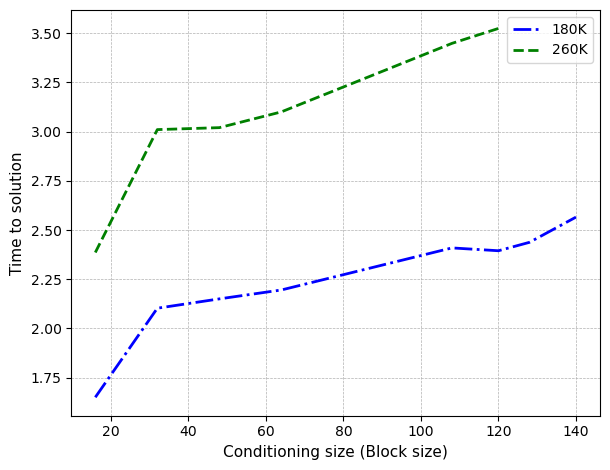

In [13]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6.2, 4.8))

# Plot both arrays with different colors and line styles
plt.plot(cs_set_180, locs_180_time_glops[0, :], color='blue', linestyle='-.', linewidth=2, label='180K')
plt.plot(cs_set_260, locs_260_time_glops[0, :], color='green', linestyle='--', linewidth=2, label='260K')

# Adding enhanced legend, title, and labels
plt.legend() # loc='upper right', fontsize='large'
# plt.title('Elegant Plot of sin(x) and cos(x)', fontsize=16)
plt.xlabel('Conditioning size (Block size)', fontsize=11)
plt.ylabel('Time to solution', fontsize=11)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
# plt.savefig(f'./fig/{info[1]}_{info[2]}.pdf')
# Show the plot
plt.show()

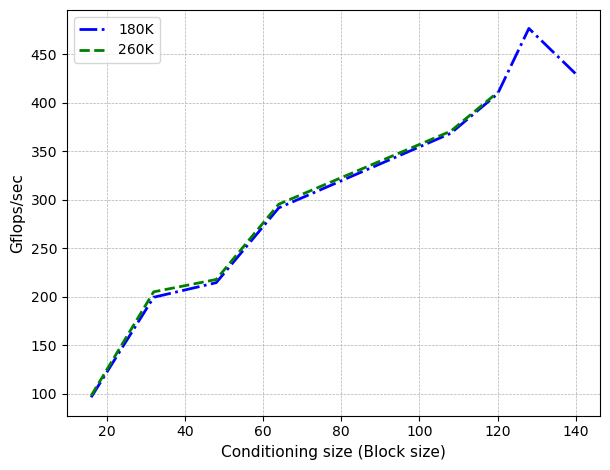

In [14]:
# Create a plot with a larger size and a better style
plt.figure(figsize=(6.2, 4.8))

# Plot both arrays with different colors and line styles
plt.plot(cs_set_180, locs_180_time_glops[1, :], color='blue', linestyle='-.', linewidth=2, label='180K')
plt.plot(cs_set_260, locs_260_time_glops[1, :], color='green', linestyle='--', linewidth=2, label='260K')

# Adding enhanced legend, title, and labels
plt.legend() # loc='upper right', fontsize='large'
# plt.title('Elegant Plot of sin(x) and cos(x)', fontsize=16)
plt.xlabel('Conditioning size (Block size)', fontsize=11)
plt.ylabel('Gflops/sec', fontsize=11)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
# plt.savefig(f'./fig/{info[1]}_{info[2]}.pdf')
# Show the plot
plt.show()